식신E식권을 이용하는 직장인들의 점심 식대 소비 통계 데이터

포함지역: 서울특별시, 부산광역시, 대구광역시, 인천광역시, 광주광역시, 대전광역시, 경기도, 강원도, 충청북도, 충청남도, 전라남도, 경상북도, 경상남도, 제주특별자치도 

추출컬럼: 기준년월, 시도코드, 삼식구분코드, 업종카테고리명(식당), 시도명, 평균사용횟수(소지역 이용 카운트의 평균)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SSN00010A_202208.csv',encoding='cp949')

In [4]:
df.head()

,STD_YM,CTPV_CD,KDML_SP_CD,INDTY_CGR_NM,CTPV_NM,AVG_US_COUT
0,201907,11,1,동남아,서울특별시,216
1,201907,11,1,분식,서울특별시,485
2,201907,11,1,양식,서울특별시,198
3,201907,11,1,일식,서울특별시,565
4,201907,11,1,중식,서울특별시,558


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STD_YM        3100 non-null   int64 
 1   CTPV_CD       3100 non-null   int64 
 2   KDML_SP_CD    3100 non-null   int64 
 3   INDTY_CGR_NM  3100 non-null   object
 4   CTPV_NM       3100 non-null   object
 5   AVG_US_COUT   3100 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 145.4+ KB


In [6]:
df['KDML_SP_CD'].value_counts()

1    3100
Name: KDML_SP_CD, dtype: int64

In [7]:
df = df.drop(['KDML_SP_CD'], axis=1)

In [8]:
df.head()

,STD_YM,CTPV_CD,INDTY_CGR_NM,CTPV_NM,AVG_US_COUT
0,201907,11,동남아,서울특별시,216
1,201907,11,분식,서울특별시,485
2,201907,11,양식,서울특별시,198
3,201907,11,일식,서울특별시,565
4,201907,11,중식,서울특별시,558


In [9]:
df['CTPV_CD'].value_counts()

11    304
26    304
41    304
28    301
30    259
44    255
27    236
42    207
29    193
48    165
43    140
46    116
50    115
47     92
31     51
36     46
45     12
Name: CTPV_CD, dtype: int64

In [10]:
df['INDTY_CGR_NM'].value_counts()

한식          545
카페/패스트푸드    510
중식          479
편의점         376
일식          360
분식          357
양식          317
동남아         156
Name: INDTY_CGR_NM, dtype: int64

In [11]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [12]:
df_mean_ct =df.groupby('INDTY_CGR_NM').agg(mean_ct = ('AVG_US_COUT', 'mean'))
df_mean_ct 

,mean_ct
INDTY_CGR_NM,
동남아,142.250000
분식,141.680672
양식,93.305994
일식,161.741667
중식,192.329854
카페/패스트푸드,496.329412
편의점,307.946809
한식,1498.007339


In [13]:
menu_list = ['동남아','분식','양식','일식','중식','카페/패스트푸드','편의점','한식']

In [14]:
colors = sns.color_palette('hls',len(menu_list))

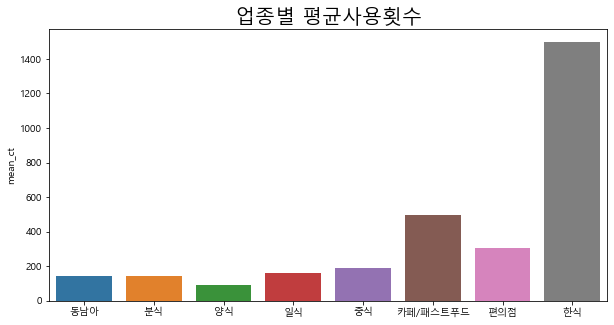

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x = menu_list, y= df_mean_ct['mean_ct'])
plt.title('업종별 평균사용횟수', size = 20) 
plt.show()

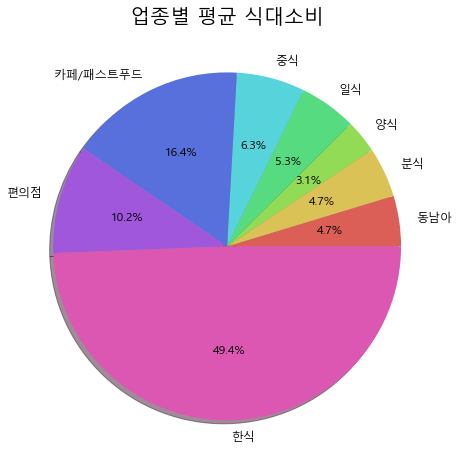

In [16]:
plt.figure(figsize = (13,8))
plt.title('업종별 평균 식대소비', size = 20)
plt.pie(df_mean_ct['mean_ct'], labels=menu_list, autopct='%.1f%%', shadow = True, textprops = {'fontsize': 12},colors = colors)
plt.show()

직장인 식권의 약 25%가 카페/패스트푸드와 편의점에 식권을 사용